I'll use this notebook to study potential LJ constituents and look into whether I can unambiguously pick out the relevant particles with dR requirements. This study should be updated to instead use pfjet.pfcand and compare directly with ljsources.

In [25]:
# python
import sys
import os
import importlib
# columnar analysis
from coffea import processor
import awkward as ak
from dask.distributed import Client
# local
sys.path.insert(1, os.path.join(sys.path[0], '../..')) # fixme: there must be a better way to handle this...
from sidm.tools import ffschema, sidm_processor, utilities
# always reload local modules to pick up changes during development
importlib.reload(ffschema)
importlib.reload(sidm_processor)
importlib.reload(utilities)
# plotting
import matplotlib.pyplot as plt
utilities.set_plot_style()

Start by looking at default 2mu2e sample with 2mu2e selection and matched dark photons.

In [26]:
fileset = {
    "2Mu2E_100GeV_1p2GeV_9p6mm": [
        "root://xcache//store/group/lpcmetx/SIDM/ffNtupleV4/2018/SIDM_XXTo2ATo2Mu2E_mXX-100_mA-1p2_ctau-9p6_TuneCP5_13TeV-madgraph-pythia8/RunIIAutumn18DRPremix-102X_upgrade2018_realistic_v15-v1/210326_161703/0000/ffNtuple_1.root",
    ],
}

In [27]:
runner = processor.Runner(
    executor=processor.IterativeExecutor(),
    #executor=processor.FuturesExecutor(),
    schema=ffschema.FFSchema,
)

p = sidm_processor.SidmProcessor(
    [
        "2mu2e_matchedLj",
    ],
    ["base_plus_gen"]
)

output = runner.run(fileset, treename="ffNtuplizer/ffNtuple", processor_instance=p)
hists = output["out"]["2Mu2E_100GeV_1p2GeV_9p6mm"]["hists"]

Output()

First add basic pf e, pf mu, pf photon, and dsa mu hists

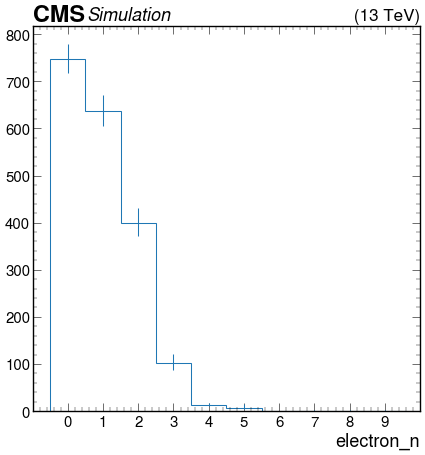

In [28]:
utilities.plot(hists["electron_n"]["2mu2e_matchedLj", :])

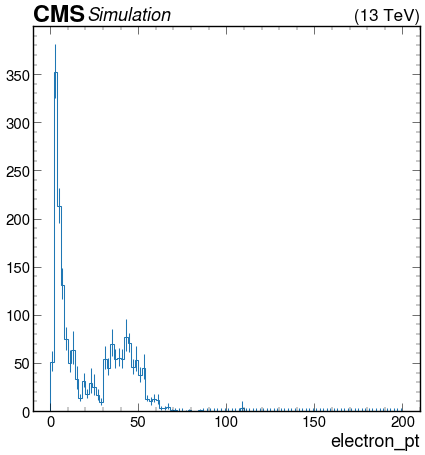

In [29]:
utilities.plot(hists["electron_pt"]["2mu2e_matchedLj", :])

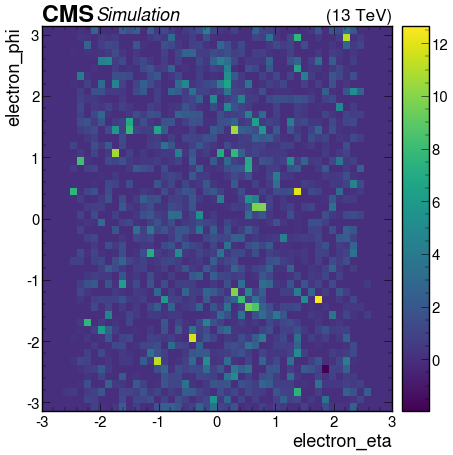

In [30]:
utilities.plot(hists["electron_eta_phi"]["2mu2e_matchedLj", :, :])

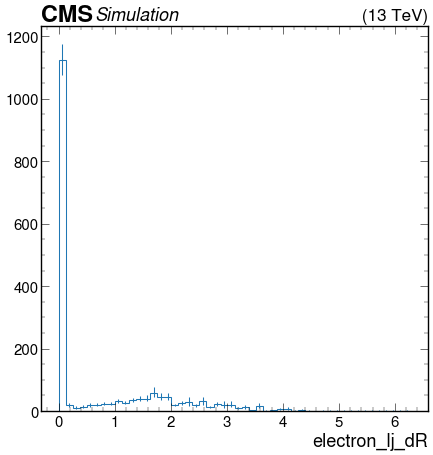

In [31]:
utilities.plot(hists["electron_lj_dR"]["2mu2e_matchedLj", :])

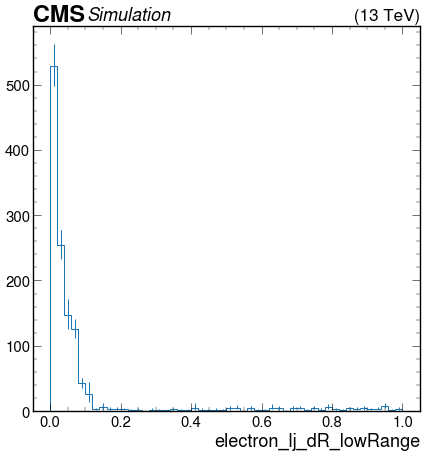

In [32]:
utilities.plot(hists["electron_lj_dR_lowRange"]["2mu2e_matchedLj", :])

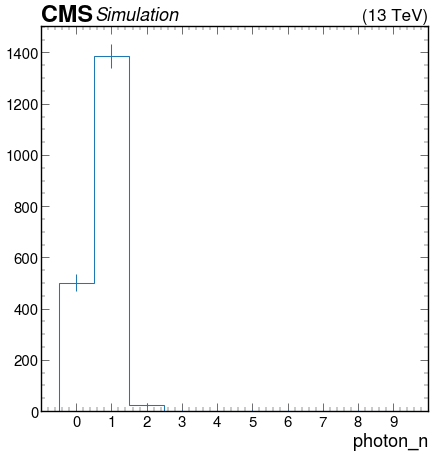

In [33]:
utilities.plot(hists["photon_n"]["2mu2e_matchedLj", :])

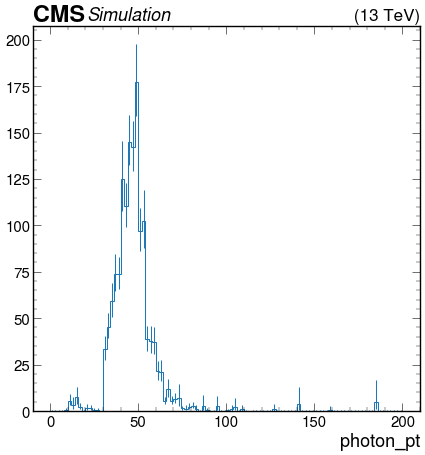

In [34]:
utilities.plot(hists["photon_pt"]["2mu2e_matchedLj", :])

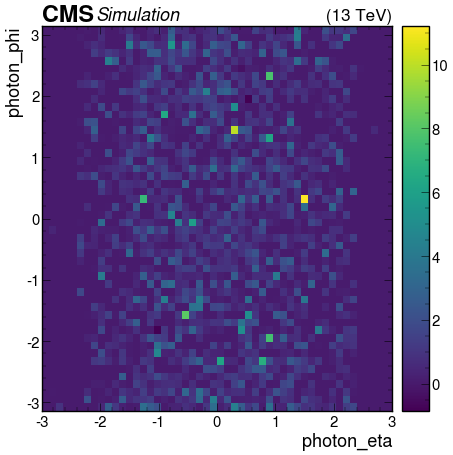

In [35]:
utilities.plot(hists["photon_eta_phi"]["2mu2e_matchedLj", :, :])

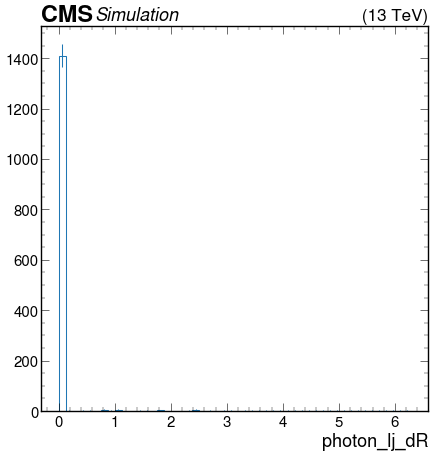

In [36]:
utilities.plot(hists["photon_lj_dR"]["2mu2e_matchedLj", :])

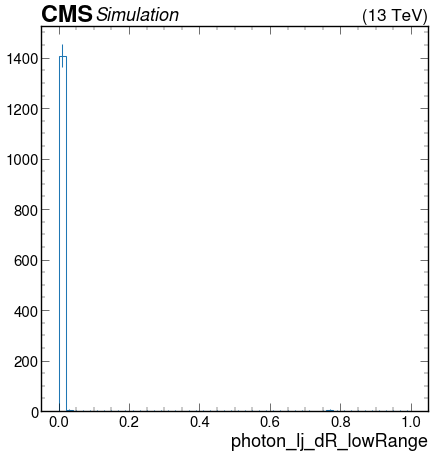

In [37]:
utilities.plot(hists["photon_lj_dR_lowRange"]["2mu2e_matchedLj", :])

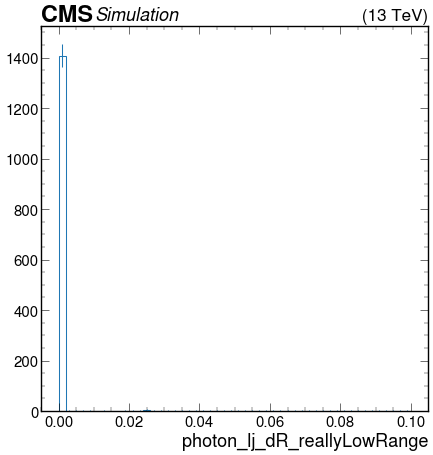

In [38]:
utilities.plot(hists["photon_lj_dR_reallyLowRange"]["2mu2e_matchedLj", :])

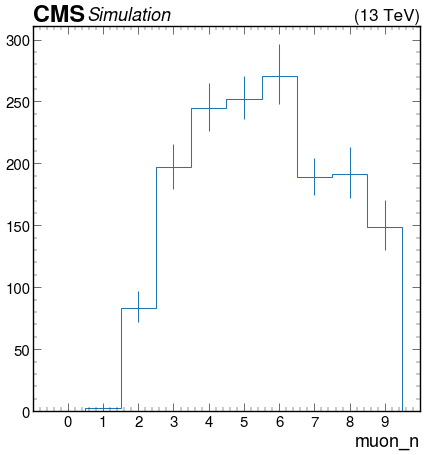

In [39]:
utilities.plot(hists["muon_n"]["2mu2e_matchedLj", :])

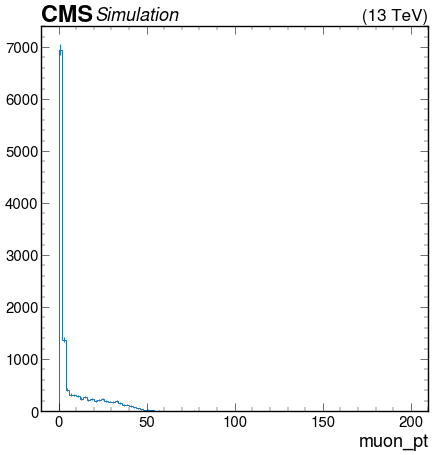

In [40]:
utilities.plot(hists["muon_pt"]["2mu2e_matchedLj", :])

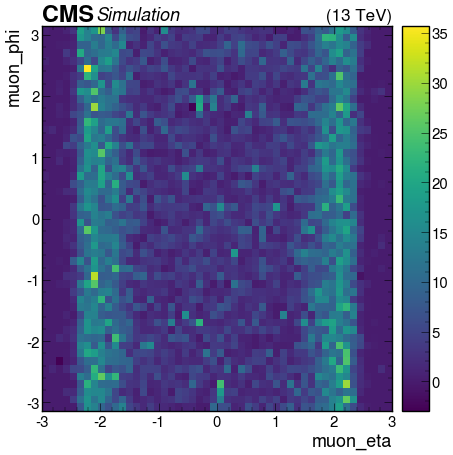

In [41]:
utilities.plot(hists["muon_eta_phi"]["2mu2e_matchedLj", :, :])

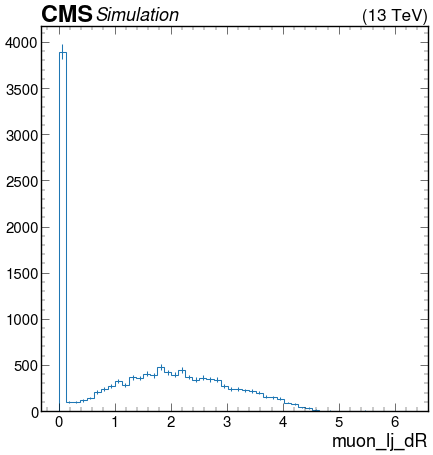

In [42]:
utilities.plot(hists["muon_lj_dR"]["2mu2e_matchedLj", :])

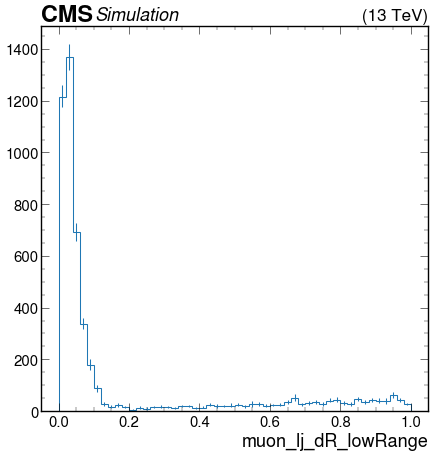

In [43]:
utilities.plot(hists["muon_lj_dR_lowRange"]["2mu2e_matchedLj", :])

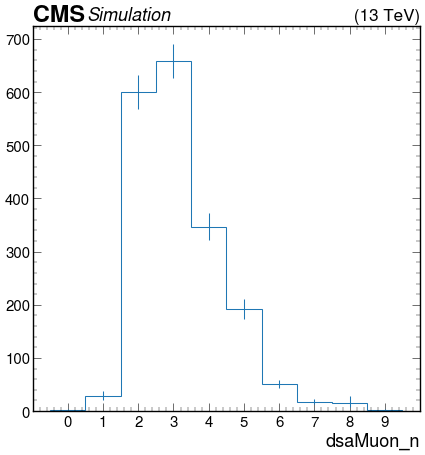

In [44]:
utilities.plot(hists["dsaMuon_n"]["2mu2e_matchedLj", :])

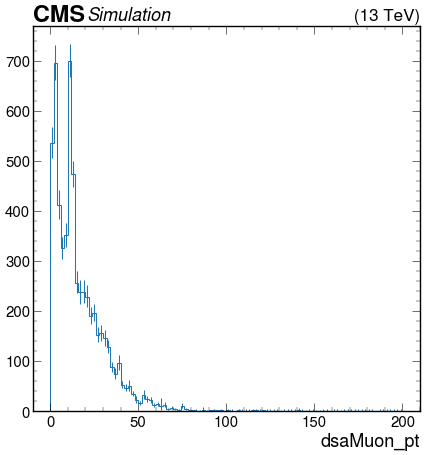

In [45]:
utilities.plot(hists["dsaMuon_pt"]["2mu2e_matchedLj", :])

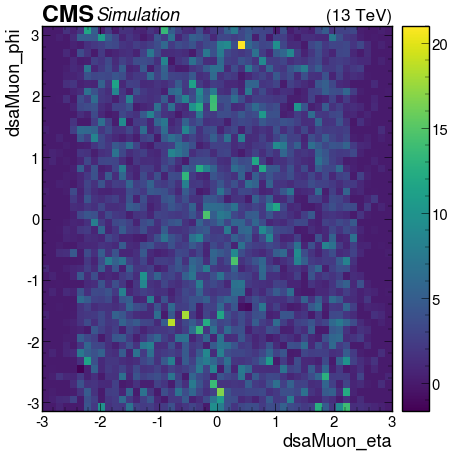

In [46]:
utilities.plot(hists["dsaMuon_eta_phi"]["2mu2e_matchedLj", :, :])

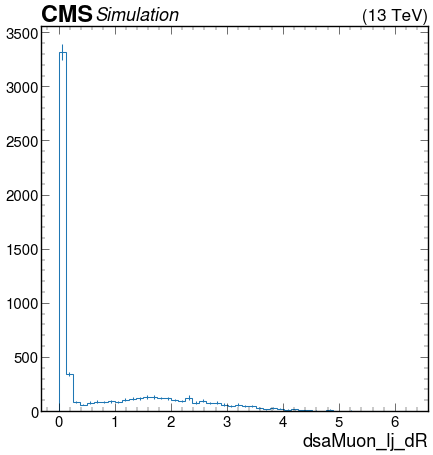

In [47]:
utilities.plot(hists["dsaMuon_lj_dR"]["2mu2e_matchedLj", :])

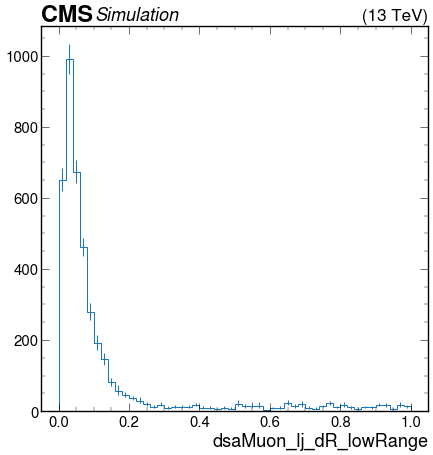

In [48]:
utilities.plot(hists["dsaMuon_lj_dR_lowRange"]["2mu2e_matchedLj", :])

The photon hists in particular are interesting in that photon pT tends to ~= dark photon pT and dR(photon, LJ) tends to be exactly 0. I guess it makes sense that the majority of LJs whose constituents include photons are just a single reco photon from the dark photon decaying to two nearby electrons in ECAL. We've seen in the lj_resolution notebook that photon LJs appear to have much better pT resolution -- perhaps this is the cause.

Next, I would be interested in looking at the following:
- these same distributions after filtering the collections with pT, id, eta, and dR(LJ) criteria to only include potential LJ constituents
- which particles LJs tend to be composed of (is it more or less always 2 mu, 2 e, or 1 photon, or are more complicated combinations possible/frequent?)
- can I successfully match the reco e, mu, and photons with the gen dark photon daughters?
- do LJs sometimes miss some of the gen dark photon daughters?